In [3]:
# MAP DISPLAY 100x100
!pip install geopandas

Looking in indexes: http://172.17.0.1:3143/root/pypi/+simple/
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/a40/2a565e727642c/geopandas-0.14.0-py3-none-any.whl (1.1 MB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/d72/2d7f01a66f4ab/fiona-1.9.5-cp311-cp311-manylinux2014_x86_64.whl (15.7 MB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/65a/d699e0c830e2b/pyproj-3.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/737/dba15011e5a9b/shapely-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/5d2/62006d3222f50/click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/c1c/a117dbce1fe20/cligj-0.7.2-py3-none-any.whl (7.1 kB)


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from geopandas import GeoSeries

In [5]:
def readPolygonFromFile(filename):
  with open(filename) as f:
      str = [word for line in f for word in line.split(", ")]
  
  geom = []
  for i in range(len(str)):
      lon, lat = str[i].split(" ")
      geom.append((float(lon), float(lat)))
  p1 = Polygon(geom)
  poly_gdf = gpd.GeoDataFrame(geometry = [p1], crs = "EPSG:3346")
  return poly_gdf

In [6]:
# importing economic file
geo_data = gpd.read_file('100eco/grid100.shp')
geo_data = geo_data.to_crs(epsg=4326)

geo_data_2021_ = geo_data[geo_data.metai ==  2021 ]

100x100mX49450Y60855 :  269080
Average income :  9240650.49928923


Text(0.5, 0.98, 'Income')

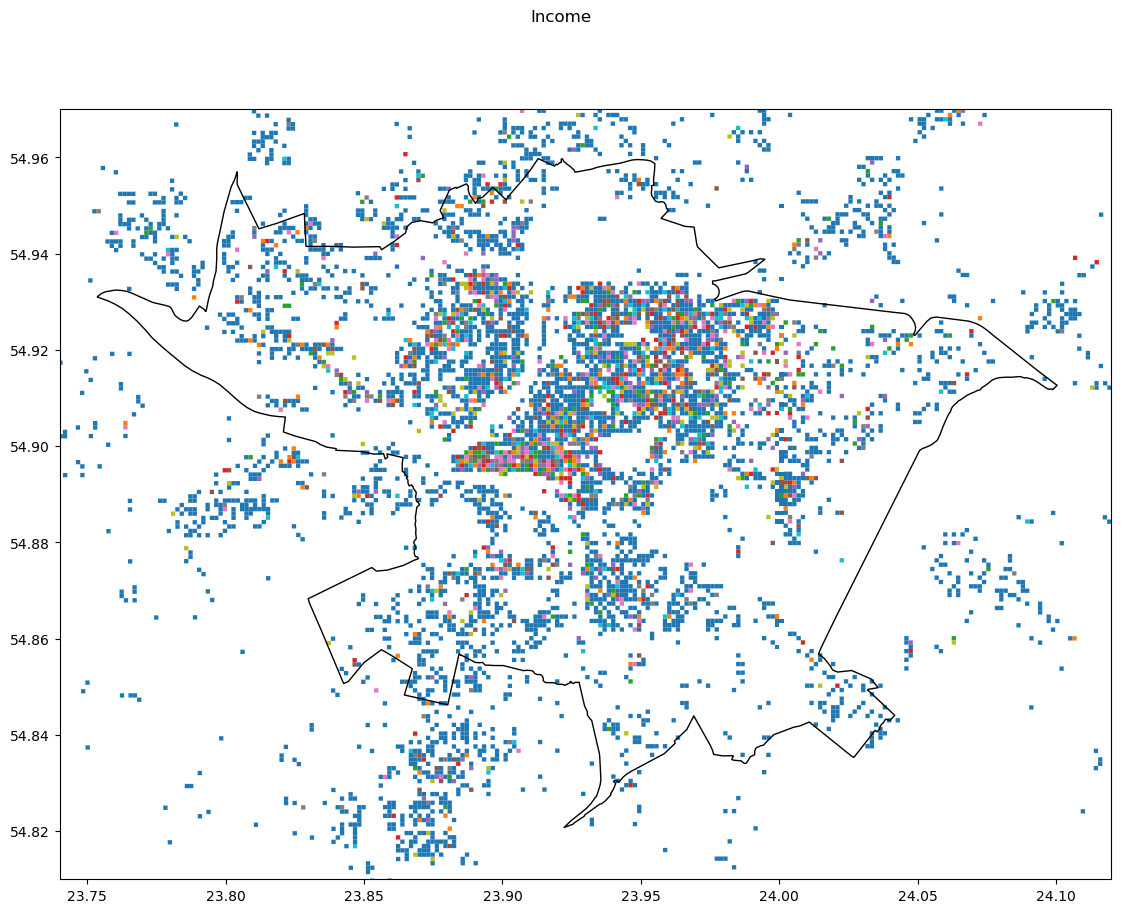

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
geo_data_2021_['pajamosu'] = geo_data_2021_['pajamos']

incomeSum = 0
numberInSum = 0
for index, row in geo_data_2021_.iterrows():
    geo_data_2021_.at[index,'pajamosu'] = str(int(row['pajamos']) * 1)
    grid_id = row['grid_id']
    pajamos_value = row['pajamos']
    #print(f"GRID_ID: {grid_id}, PAJAMOS: {pajamos_value}")
    if grid_id == "100x100mX49450Y60855":
        print("100x100mX49450Y60855 : ", pajamos_value)
        #print("### index ###", index)
        #print("### row ###", row)
    if int(pajamos_value) > 0:
        numberInSum += 1
        incomeSum += int(pajamos_value)
print("Average income : ", (incomeSum / numberInSum))

fig, ax =  plt.subplots(1, 1)
#print(geo_data.head())

geo_data_2021_.plot(column = geo_data_2021_.pajamosu , ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLine = readPolygonFromFile("kaunas.txt")
exteriorLineScaled = exteriorLine.to_crs(epsg=4326)
exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))
fig.suptitle('Income')

In [8]:
# importing population file
geo_data = gpd.read_file('100pop/grid100.shp')
geo_data = geo_data.to_crs(epsg=4326)

Average population :  36.228417932567616
Min and max population :  3 1036


Text(0.5, 0.98, 'Population')

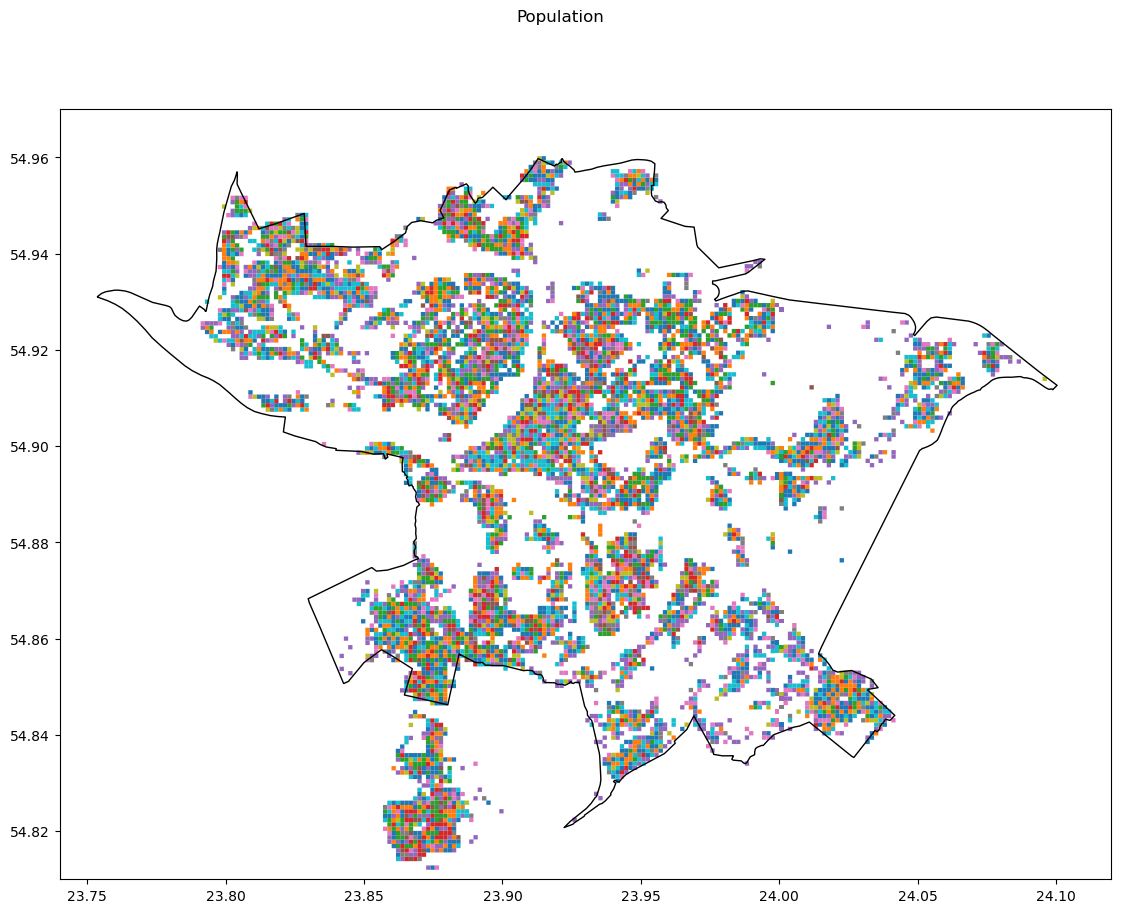

In [9]:
#print(geo_data.head())
geo_data['POPu'] = geo_data['POP']
populationSum = 0
numberInSum = 0
minpop = 1000
maxpop = 0
for index, row in geo_data.iterrows():
    pop = row['POP']
    ipop = int(pop)
    geo_data.at[index,'POPu'] = str(int(row['POP']) * 1)
    #print(f"GRID_ID: {grid_id}, PAJAMOS: {pajamos_value}")
    if (ipop > maxpop):
        maxpop = ipop
    if (ipop < minpop):
        minpop = ipop
    if ipop > 0:
        numberInSum += 1
        populationSum += ipop
print("Average population : ", (populationSum / numberInSum))
print("Min and max population : ", minpop, maxpop)

plt.rcParams["figure.figsize"] = (20,10)

fig, ax =  plt.subplots(1, 1)
#print(geo_data.head())

geo_data.plot(column = geo_data.POPu, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLine = readPolygonFromFile("kaunas.txt")
exteriorLineScaled = exteriorLine.to_crs(epsg=4326)
exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))
fig.suptitle('Population')

Average Income per Habitant :  372667.09163985954
Min and max Income per Habitant :  10000000000 0


Text(0.5, 0.98, 'Population')

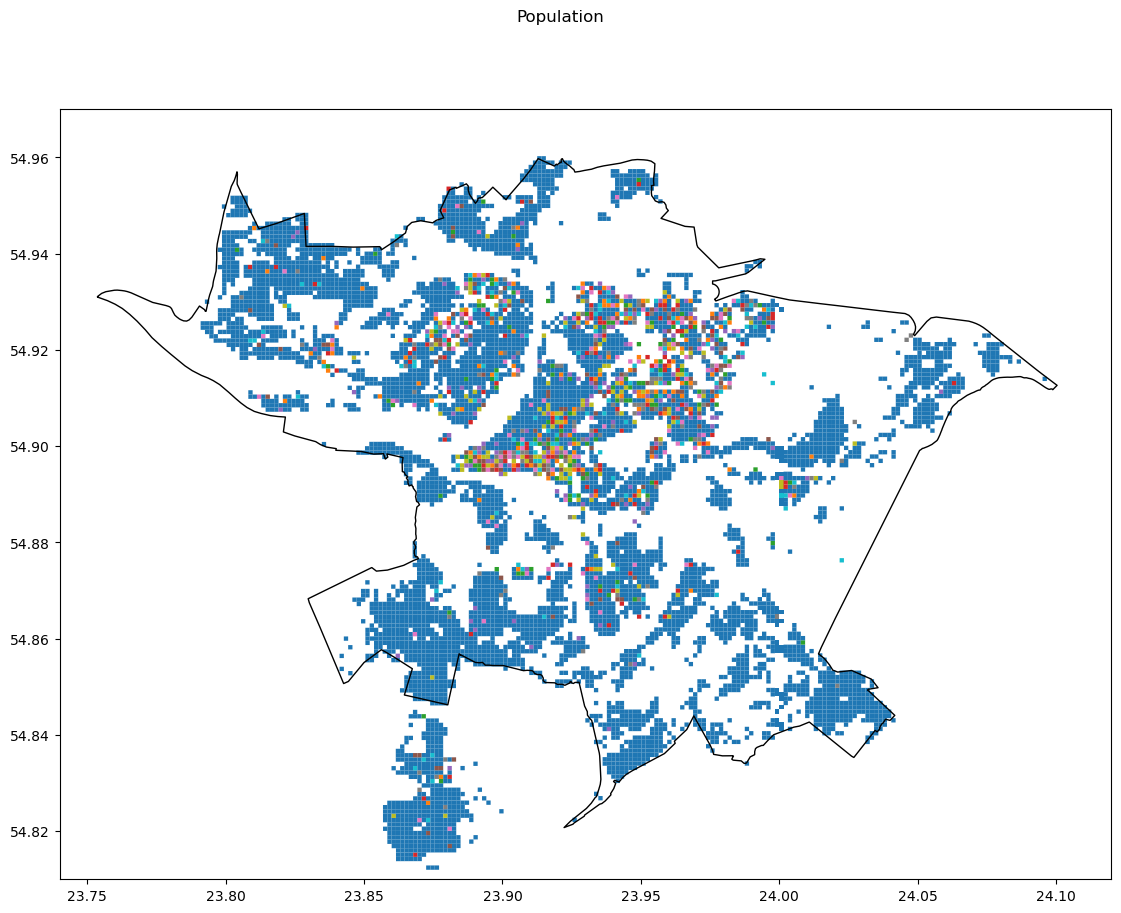

In [11]:
# WARNING ! VERY LONG TIME COMPUTING !
geo_data['incomePerH'] = geo_data['POP']
iphSum = 0
numberInSum = 0
miniph = 10000000000
maxiph = 0
for index, row in geo_data.iterrows():
    pop = row['POP']
    ipop = int(pop)
    selected_row = geo_data_2021_.loc[geo_data_2021_['grid_id'] == row['GRID_ID']]
    iph = 0
    # Check if a row of economic table with the specific GRID_ID exists
    if not selected_row.empty:
        iph = int(selected_row['pajamos'].values[0]) / ipop
    
    geo_data.at[index,'incomePerH'] = str(iph)
    #print(f"GRID_ID: {grid_id}, PAJAMOS: {pajamos_value}")
    if (iph > maxiph):
        maxpop = iph
    if (0 > iph < miniph):
        minpop = iph
    if iph > 0:
        numberInSum += 1
        iphSum += iph
print("Average Income per Habitant : ", (iphSum / numberInSum))
print("Min and max Income per Habitant : ", miniph, maxiph)

plt.rcParams["figure.figsize"] = (20,10)

fig, ax =  plt.subplots(1, 1)
#print(geo_data.head())

geo_data.plot(column = geo_data.incomePerH, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLine = readPolygonFromFile("kaunas.txt")
exteriorLineScaled = exteriorLine.to_crs(epsg=4326)
exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))
fig.suptitle('Population')